In [1]:
import json
import os 
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import glob
import pprint

In [10]:
# Display available logs
print(pprint.pformat(glob.glob("logs/*/*/*PixelEncoderFullGroupConvBigger*/train.log")))

['logs/reacher_easy/video_hard__video99/no_pretraining_PixelEncoderFullGroupConvBigger_seed2/train.log',
 'logs/reacher_easy/video_hard__video99/imagenetSupervised_pretrain_PixelEncoderFullGroupConvBigger_seed2/train.log',
 'logs/reacher_easy/no_ss/no_pretraining_PixelEncoderFullGroupConvBigger_seed2/train.log',
 'logs/reacher_easy/no_ss/imagenetSupervised_pretrain_PixelEncoderFullGroupConvBigger_seed2__RETRY_weightInitBug/train.log',
 'logs/reacher_easy/no_ss/imagenetSupervised_pretrain_PixelEncoderFullGroupConvBigger_seed2/train.log',
 'logs/walker_walk/video_hard__video0/no_pretraining_PixelEncoderFullGroupConvBigger_seed2/train.log',
 'logs/walker_walk/video_hard__video0/imagenetSupervised_pretrain_PixelEncoderFullGroupConvBigger_seed2/train.log',
 'logs/walker_walk/no_ss/no_pretraining_PixelEncoderFullGroupConvBigger_seed2/train.log',
 'logs/walker_walk/no_ss/imagenetSupervised_pretrain_PixelEncoderFullGroupConvBigger_seed2__RETRY_weightInitBug/train.log',
 'logs/walker_walk/no_ss

In [27]:
def show_log(log_dir):
    log_dir = os.path.join("logs/", log_dir)
    plot_name = "/".join(log_dir.split("/")[-3:])
    log_fname = os.path.join(log_dir, "train.log")
    eval_fname = os.path.join(log_dir, "eval.log")
    
    X = []
    y = []
    
    with open(log_fname, 'r') as f:
        for line in f:
            curr_log = json.loads(line)
            X.append(curr_log['step'])
            y.append(curr_log['episode_reward'])
    
    # Calculate moving average
    N=5
    y = np.convolve(y, np.ones((N,))/N, mode='same')
    
    X = X[:-N//2]
    y = y[:-N//2]
    
    return X, y, plot_name

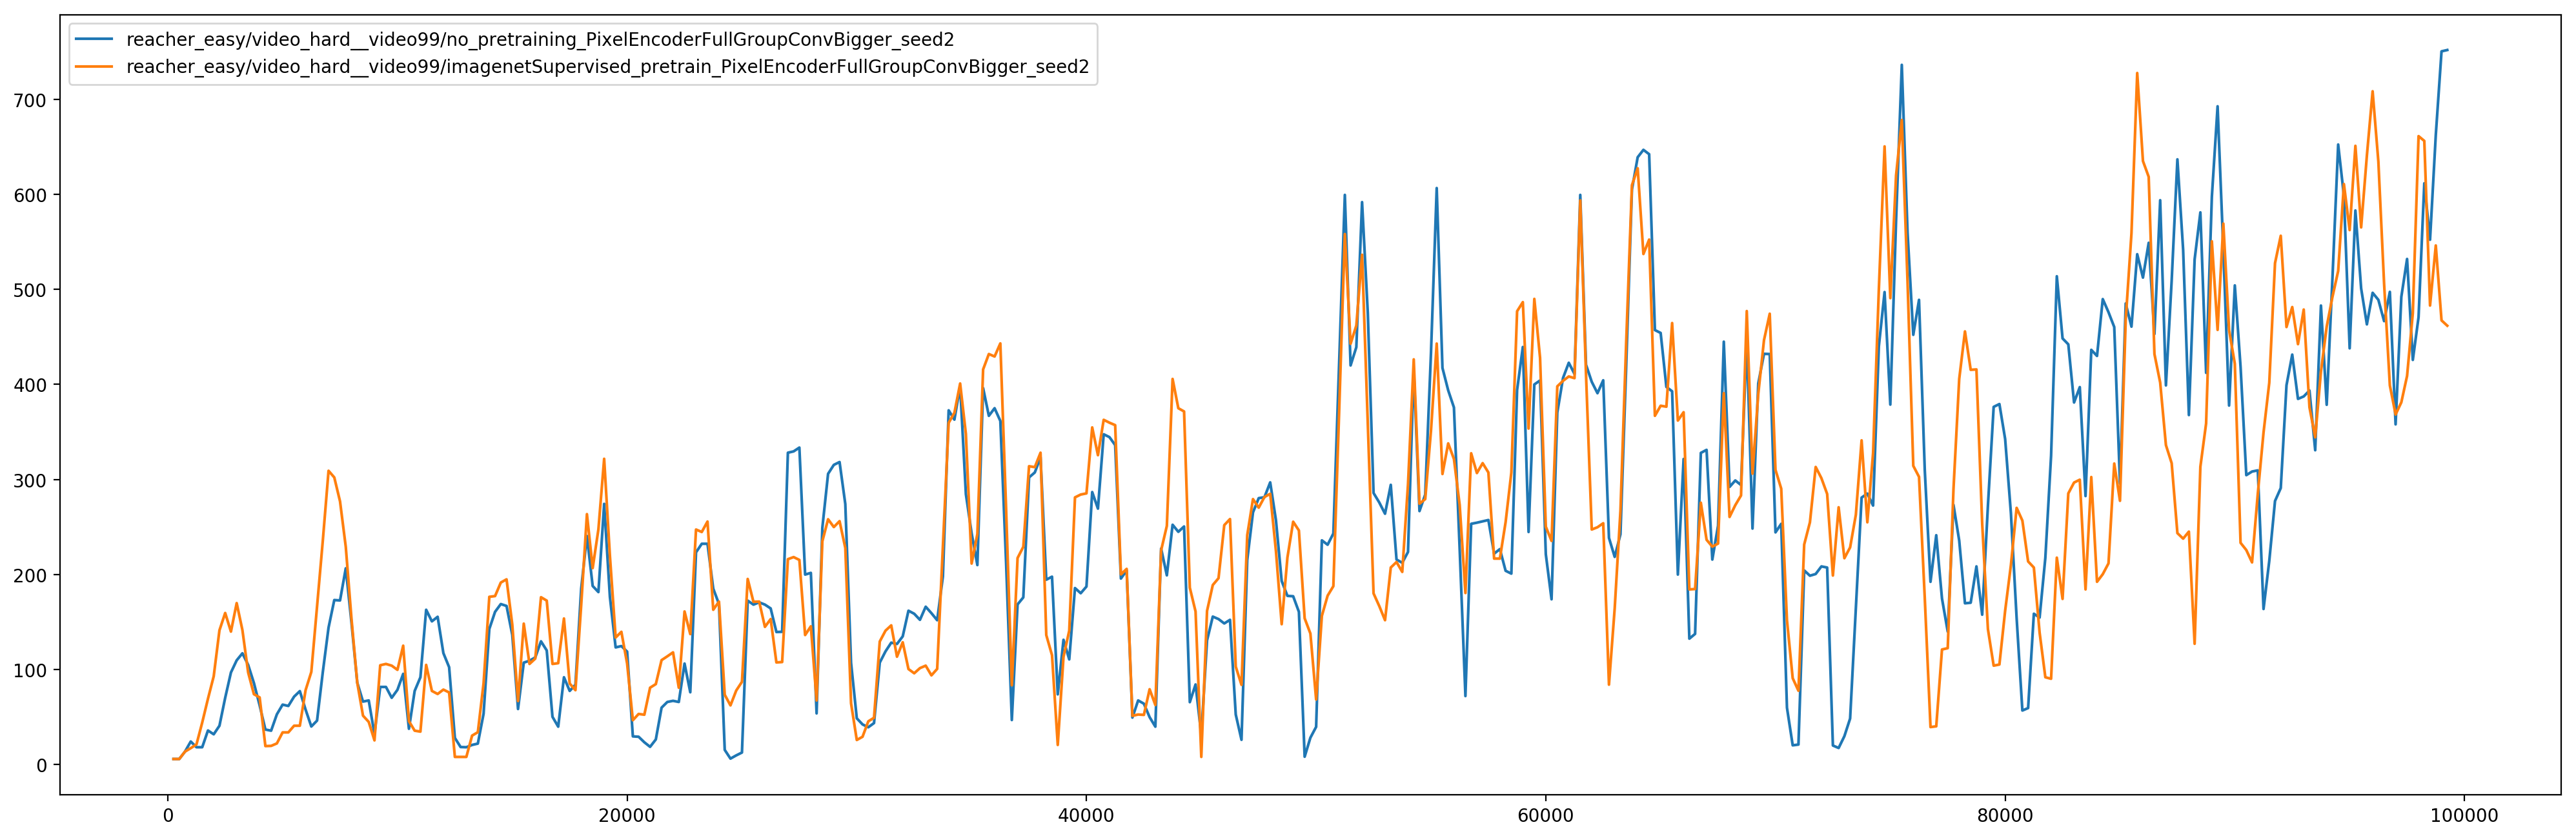

In [28]:
# Reacher Easy on Video Hard
visualize_fnames = [
    "reacher_easy/video_hard__video99/no_pretraining_PixelEncoderFullGroupConvBigger_seed2",
    "reacher_easy/video_hard__video99/imagenetSupervised_pretrain_PixelEncoderFullGroupConvBigger_seed2",
]

for fname in visualize_fnames:
    X, y, plot_name = show_log(fname)
    plt.plot(X, y, label=plot_name)
    # plt.vlines(X[-10], ymin=0, ymax=200, label=plot_name, color='B')

plt.rcParams['figure.figsize'] = [25, 8]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower
plt.legend()
plt.show()

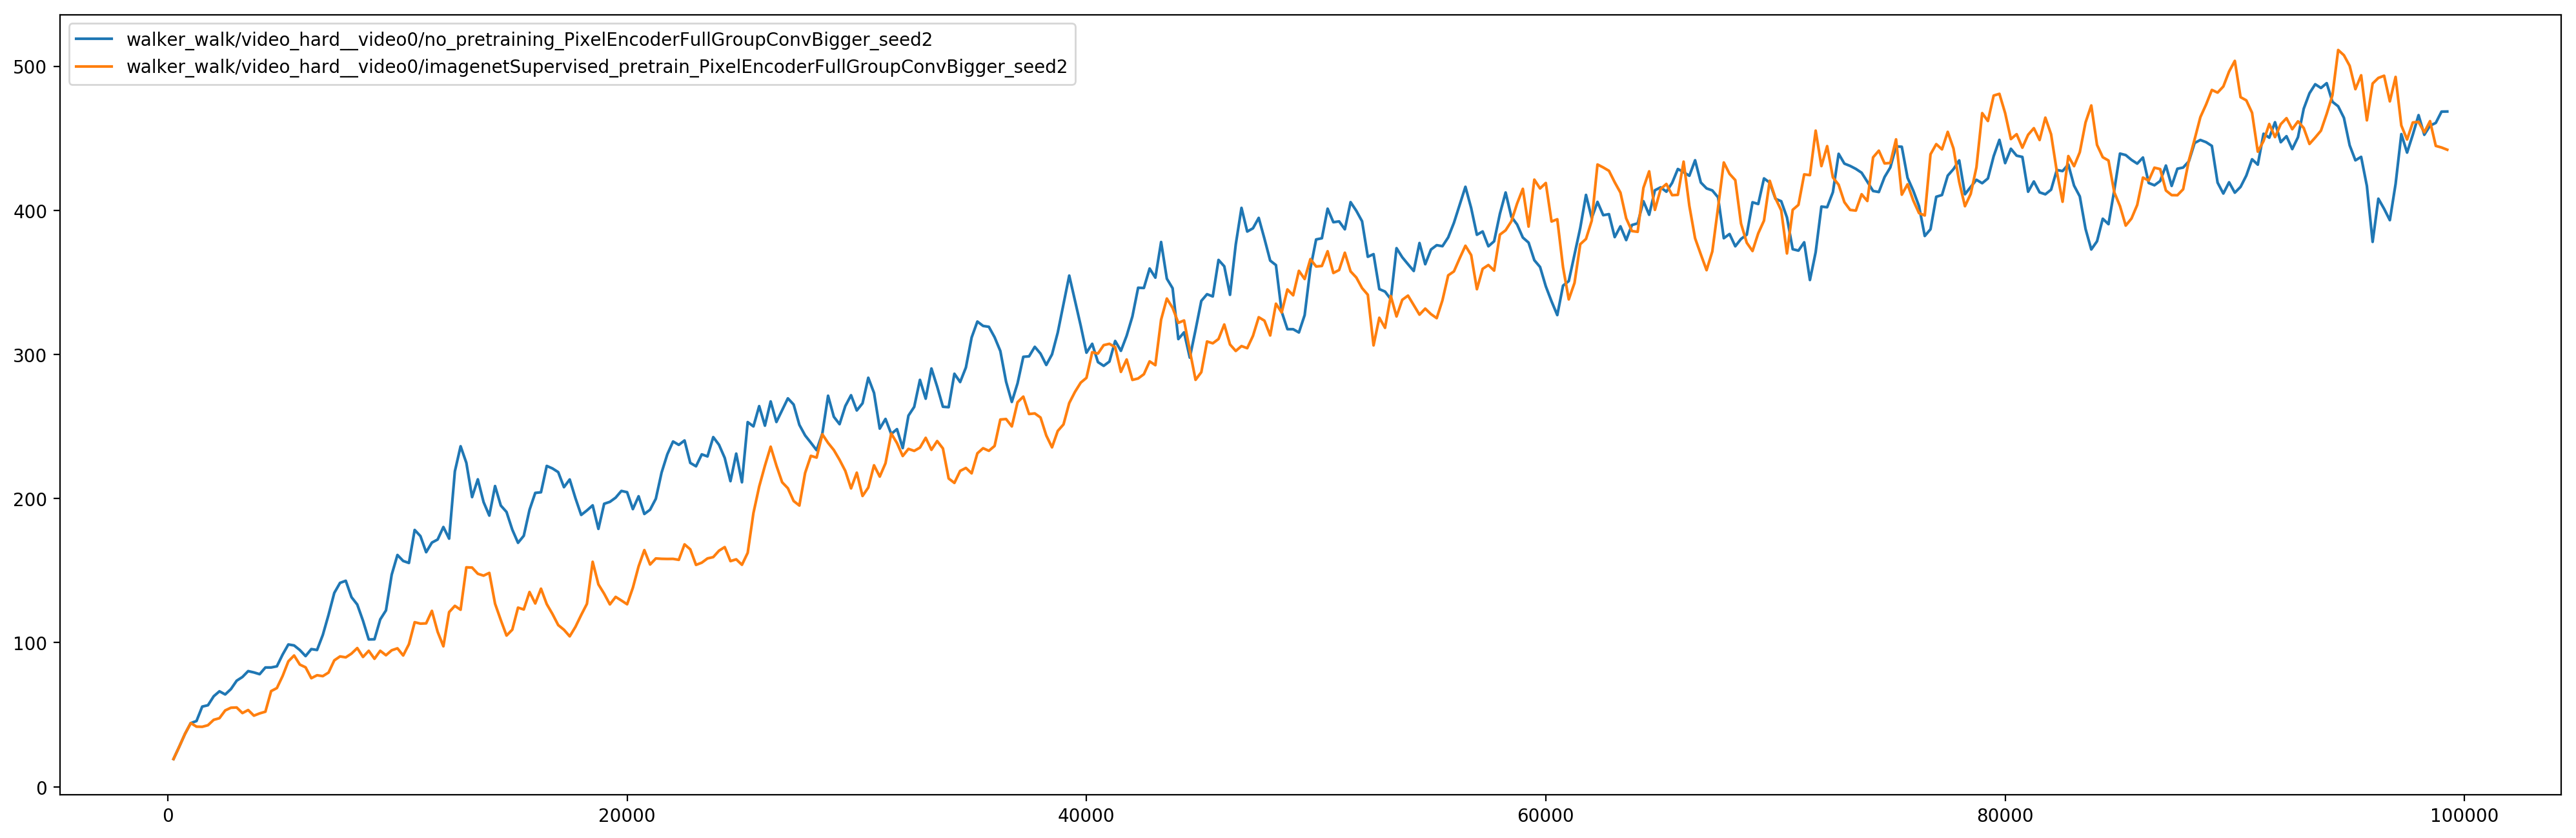

In [29]:
# walker_walk on Video Hard
visualize_fnames = [
    "walker_walk/video_hard__video0/no_pretraining_PixelEncoderFullGroupConvBigger_seed2",
    "walker_walk/video_hard__video0/imagenetSupervised_pretrain_PixelEncoderFullGroupConvBigger_seed2",
]

for fname in visualize_fnames:
    X, y, plot_name = show_log(fname)
    plt.plot(X, y, label=plot_name)
    # plt.vlines(X[-10], ymin=0, ymax=200, label=plot_name, color='B')

plt.rcParams['figure.figsize'] = [25, 8]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower
plt.legend()
plt.show()

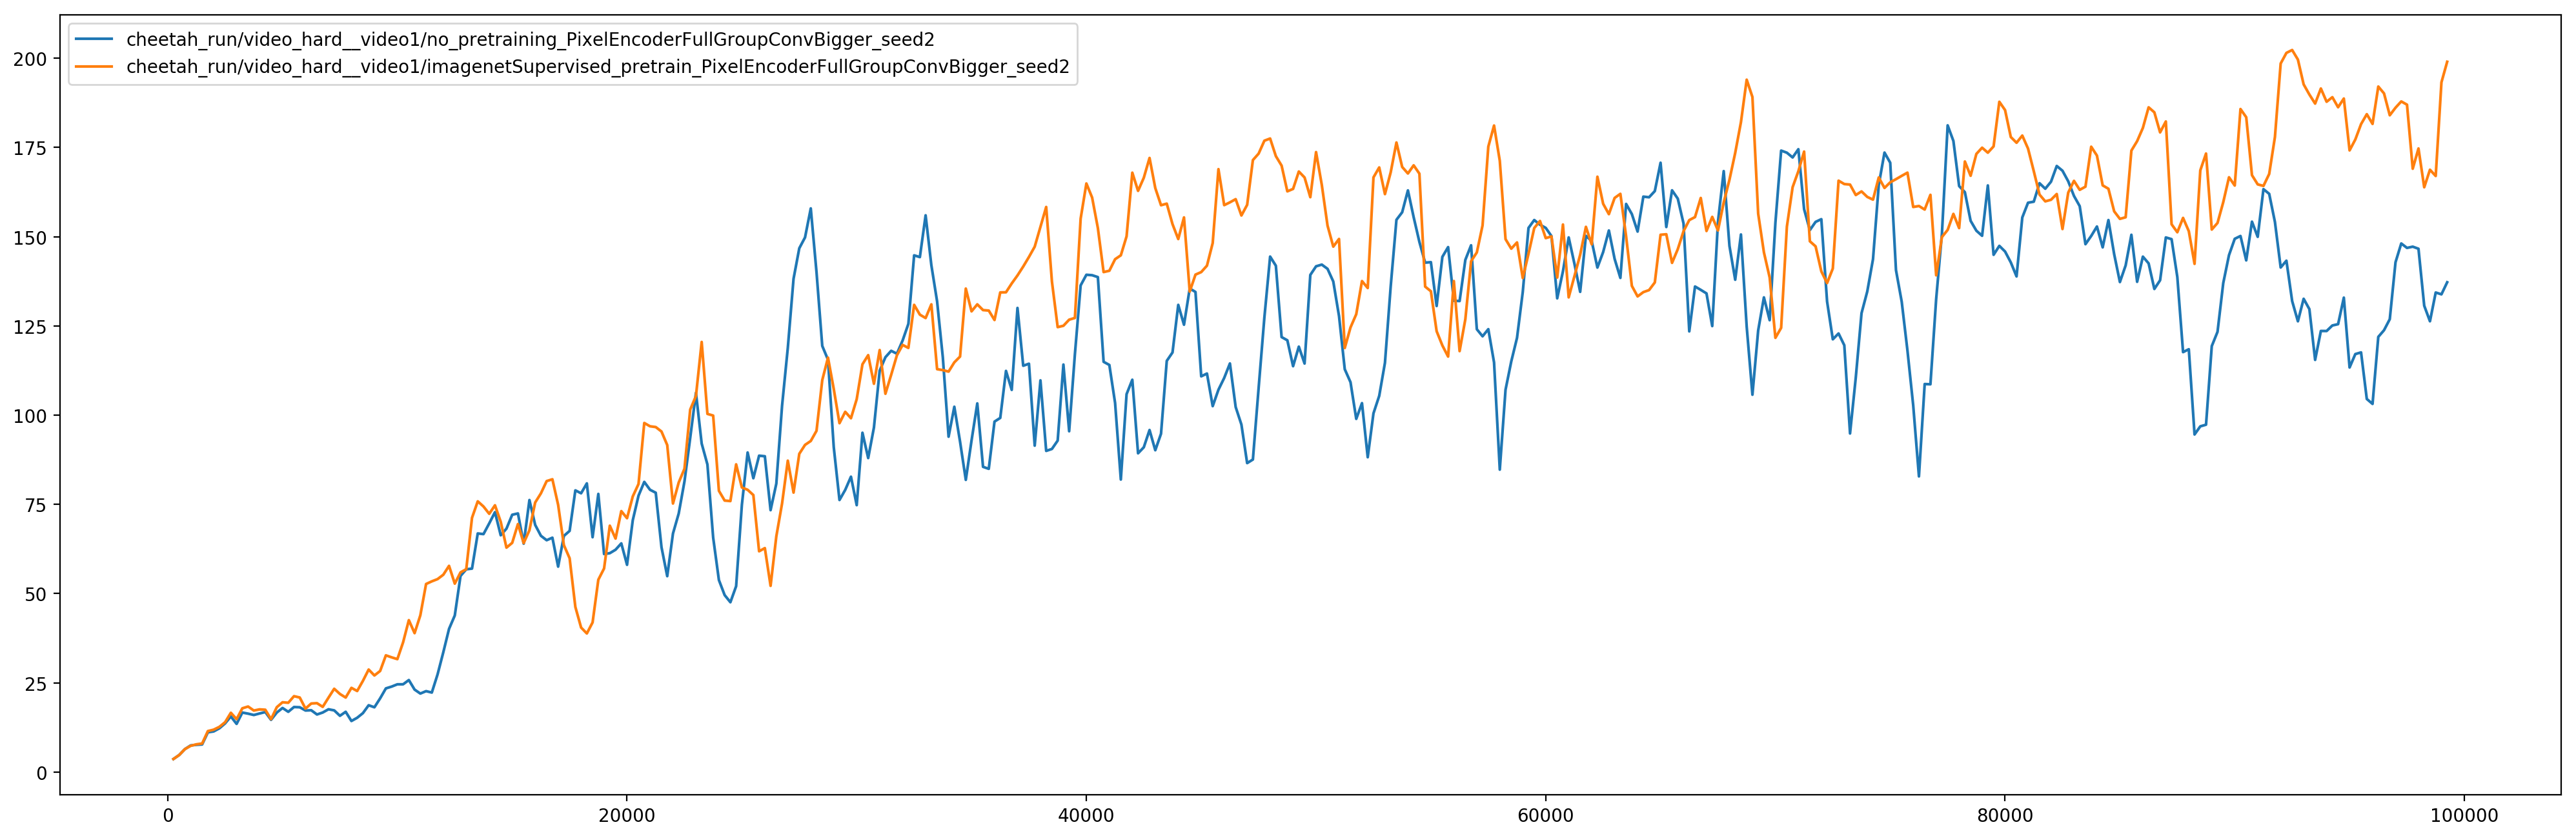

In [30]:
# cheetah_run on Video Hard
visualize_fnames = [
    "cheetah_run/video_hard__video1/no_pretraining_PixelEncoderFullGroupConvBigger_seed2",
    "cheetah_run/video_hard__video1/imagenetSupervised_pretrain_PixelEncoderFullGroupConvBigger_seed2",
]

for fname in visualize_fnames:
    X, y, plot_name = show_log(fname)
    plt.plot(X, y, label=plot_name)
    # plt.vlines(X[-10], ymin=0, ymax=200, label=plot_name, color='B')

plt.rcParams['figure.figsize'] = [25, 8]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower
plt.legend()
plt.show()

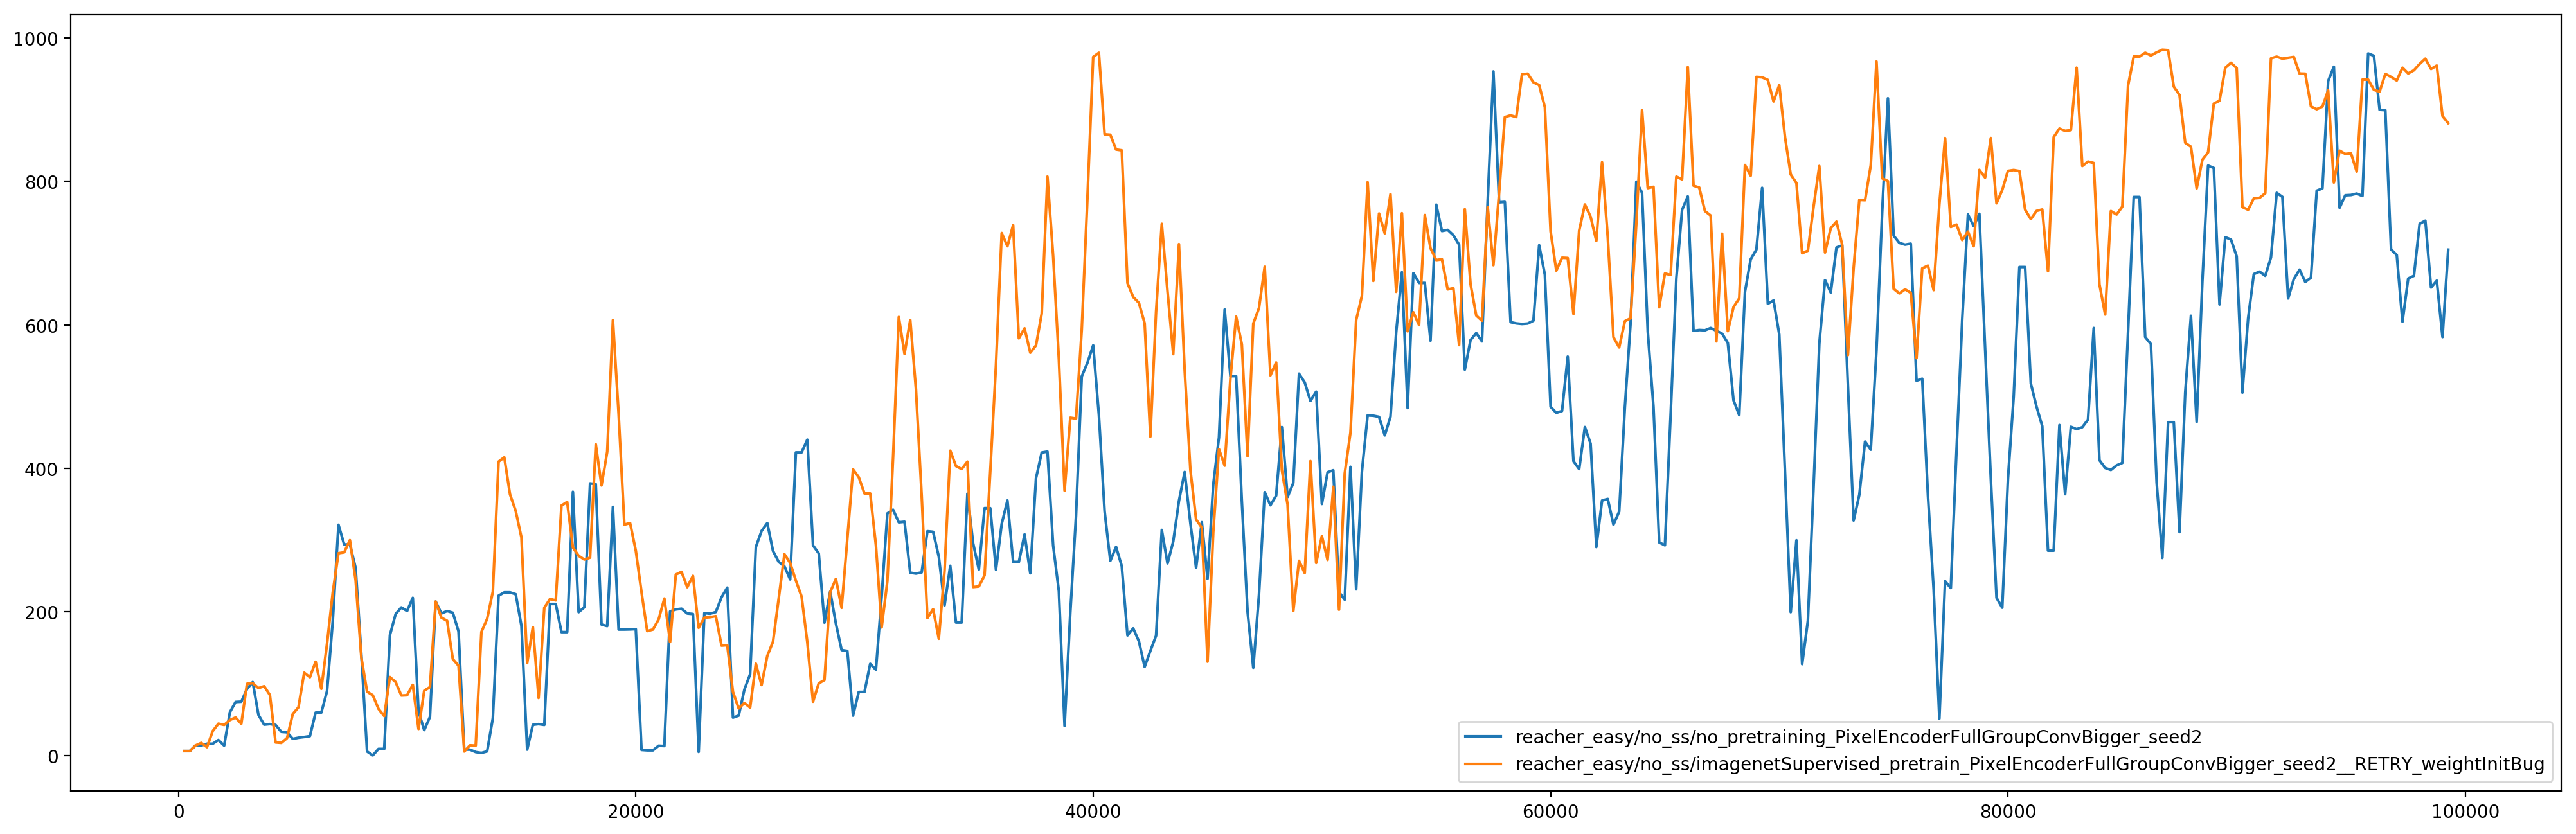

In [31]:
# Reacher Easy on Standard
visualize_fnames = [
    "reacher_easy/no_ss/no_pretraining_PixelEncoderFullGroupConvBigger_seed2",
    "reacher_easy/no_ss/imagenetSupervised_pretrain_PixelEncoderFullGroupConvBigger_seed2__RETRY_weightInitBug",
]

for fname in visualize_fnames:
    X, y, plot_name = show_log(fname)
    plt.plot(X, y, label=plot_name)
    # plt.vlines(X[-10], ymin=0, ymax=200, label=plot_name, color='B')

plt.rcParams['figure.figsize'] = [25, 8]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower
plt.legend()
plt.show()

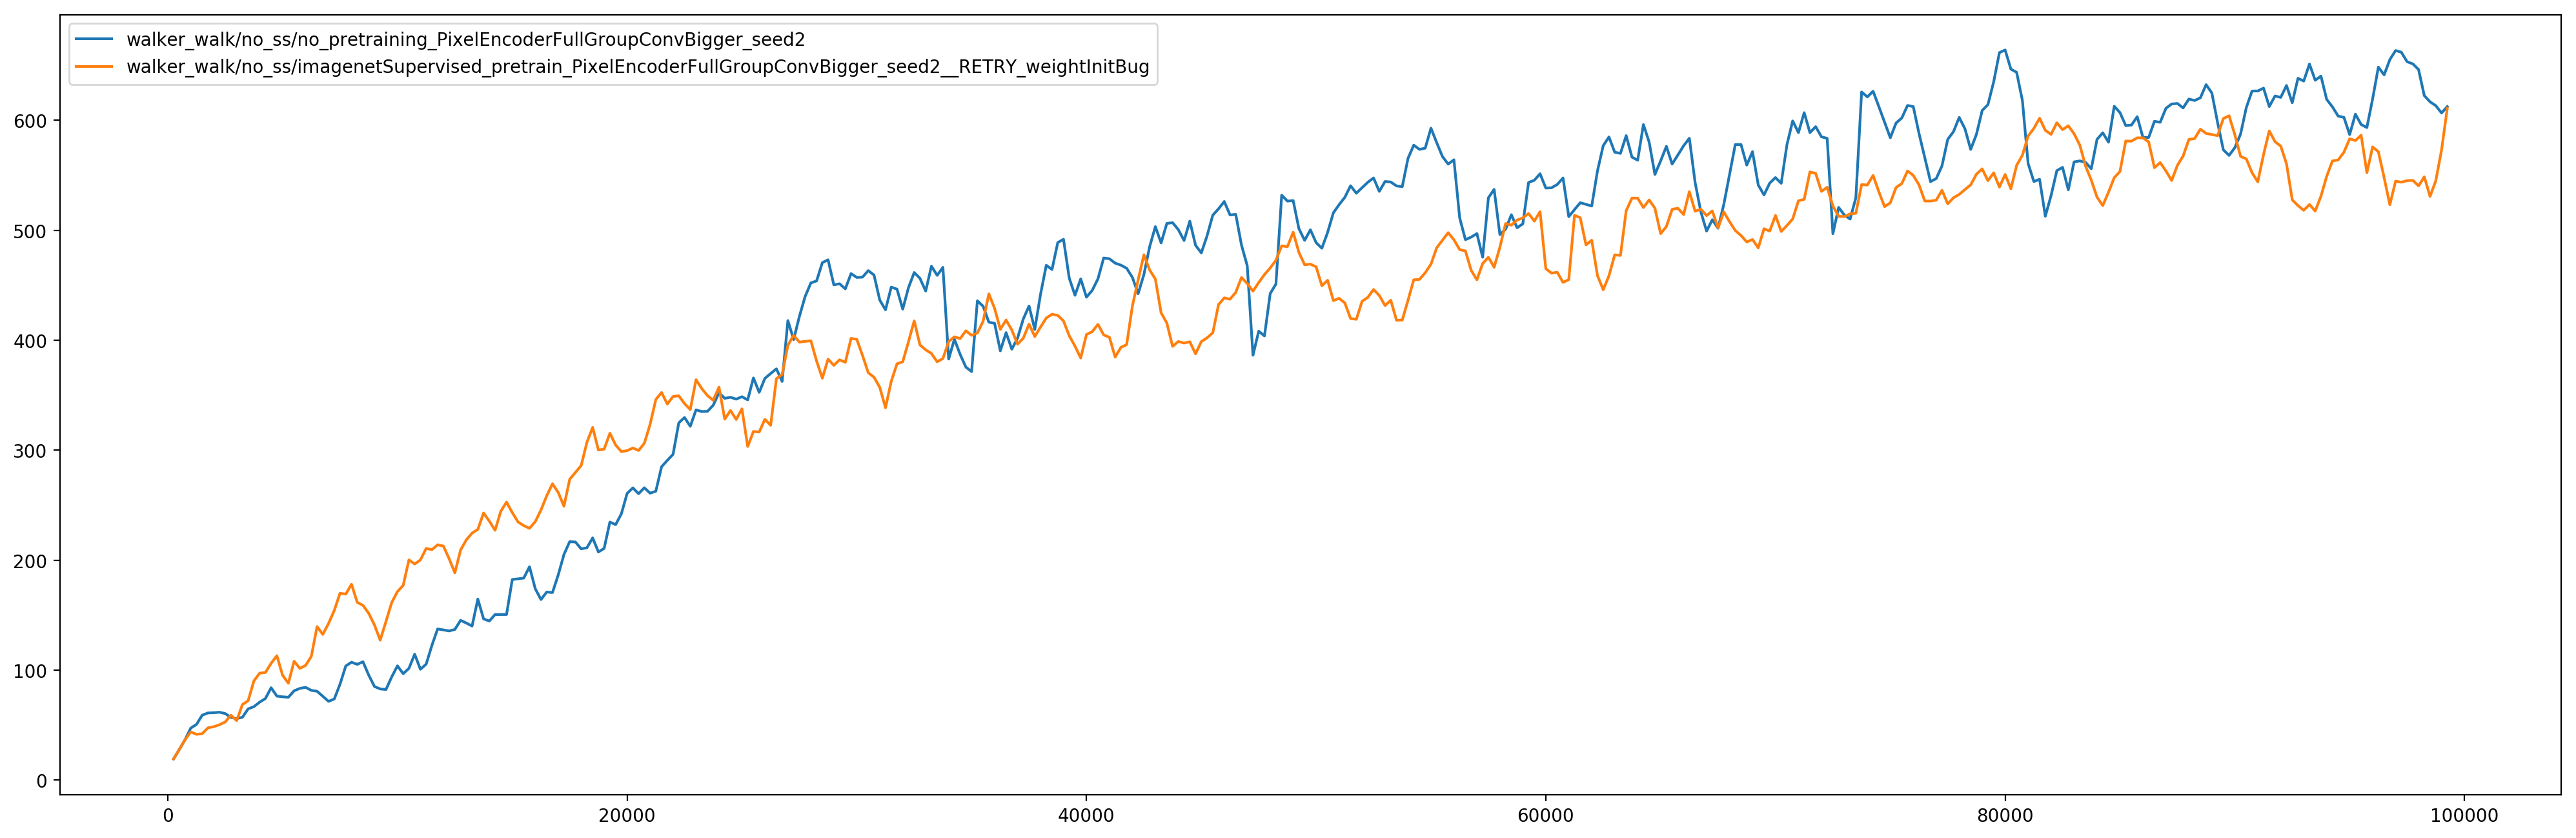

In [32]:
# Walker Walk on Standard
visualize_fnames = [
    "walker_walk/no_ss/no_pretraining_PixelEncoderFullGroupConvBigger_seed2",
    "walker_walk/no_ss/imagenetSupervised_pretrain_PixelEncoderFullGroupConvBigger_seed2__RETRY_weightInitBug",
]

for fname in visualize_fnames:
    X, y, plot_name = show_log(fname)
    plt.plot(X, y, label=plot_name)
    # plt.vlines(X[-10], ymin=0, ymax=200, label=plot_name, color='B')

plt.rcParams['figure.figsize'] = [25, 8]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower
plt.legend()
plt.show()

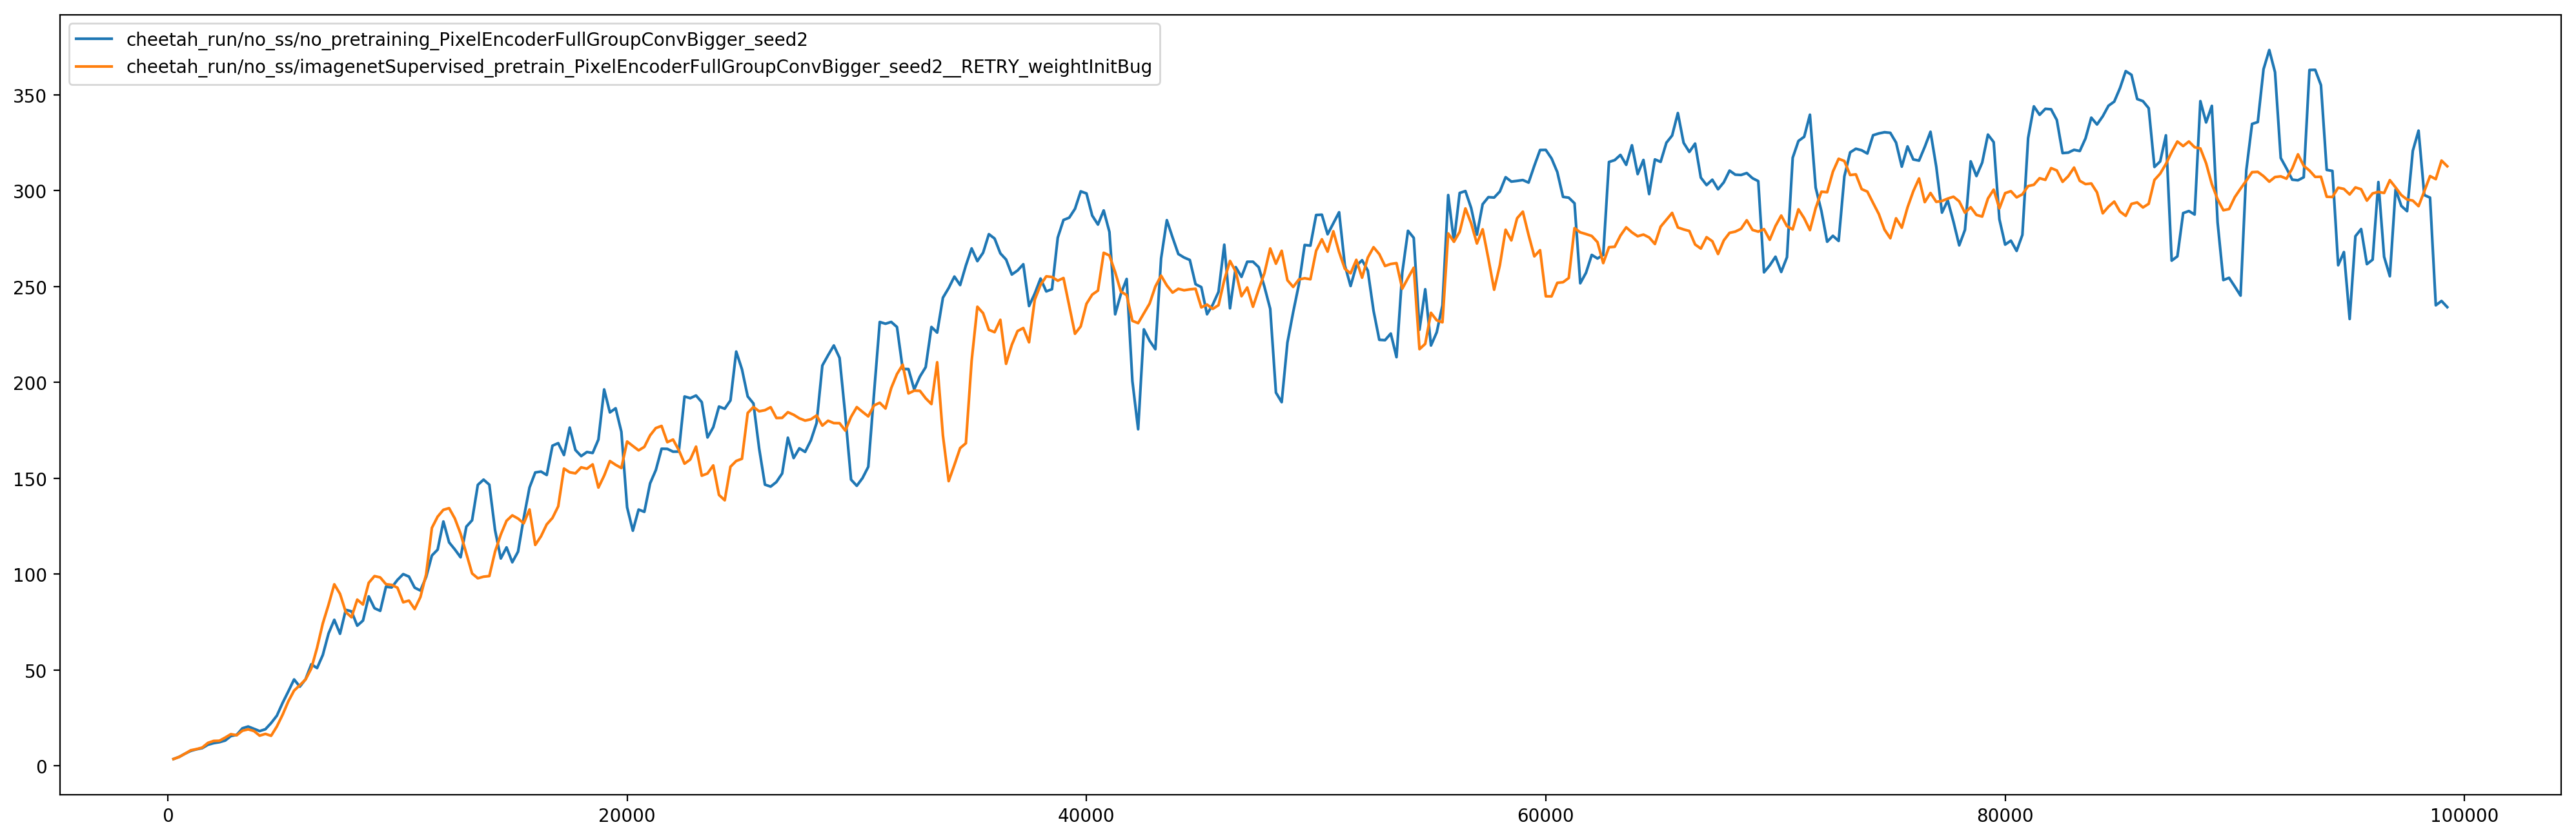

In [33]:
# Cheetah Run on Standard
visualize_fnames = [
    "cheetah_run/no_ss/no_pretraining_PixelEncoderFullGroupConvBigger_seed2",
    "cheetah_run/no_ss/imagenetSupervised_pretrain_PixelEncoderFullGroupConvBigger_seed2__RETRY_weightInitBug",
]

for fname in visualize_fnames:
    X, y, plot_name = show_log(fname)
    plt.plot(X, y, label=plot_name)
    # plt.vlines(X[-10], ymin=0, ymax=200, label=plot_name, color='B')

plt.rcParams['figure.figsize'] = [25, 8]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower
plt.legend()
plt.show()